<h1 align="center"> Loan Classification with Ensemble Methods

## Background

Lending club, a peer-to-peer lending company, has been criticized for changing their lending pratices since going public in 2015. There is reason to believe that a person who in 2014 was classified as a C grade loan, will be classified as a B (or above) post ipo. Lending Club's loan and grading data has been made public and the accusation is investigated below

## Program Info

-  1) importing important modules
-  2) Data Clensing & feature seleciton
-  3) Ensemble Methods (RF, Bagginf, LogReg, AdaBoost, Grad. Boost, NB, XGBoost)
-  4) XGBoost Random Search
-  5) Graphing Important Features
-  6) Post loan Analysis (Precision and Recall)
-  7) Results

In [41]:
#import modules
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import  ExtraTreesClassifier

#ignore Warnings
import warnings
warnings.filterwarnings("ignore")

#set show all columns
pd.set_option("display.max_columns",None)

#plotting
%matplotlib inline
import matplotlib.pyplot as plt

#  Data Cleansing

In [3]:
#read in data
df_reference = pd.read_csv('sample_data.csv', sep=',')

df=df_reference

#create binary response variable
df["depAB"] = np.where(np.isin(df['grade'], ["A", "B"]), 1 , 0)

#make bins for employee length
df["emp_length_new"] = np.where(df['emp_length']=="10+ years", "10+ years",
                                     np.where(np.isin(df['emp_length'], ["1 year",'2 years','3 years','4 years','5 years']), "1-5 years",
                                              np.where(np.isin(df['emp_length'], ['6 years','7 years','8 years','9 years']), "6-9 years",
                                                       np.where(np.isin(df['emp_length'], ["< 1 year"]), "<1 year", "n/a"))))
df = df.drop('emp_length', axis = 1)


# Feature Selection

In [4]:
pre_df = df
pre_df.columns

Index(['grade', 'Year', 'acc_open_past_24mths_x', 'annual_inc_x', 'bc_util_x',
       'dti_x', 'inq_last_6mths_x', 'mo_sin_old_rev_tl_op_x',
       'mo_sin_rcnt_rev_tl_op_x', 'mo_sin_rcnt_tl_x', 'mort_acc_x',
       'mths_since_recent_bc_x', 'num_accts_ever_120_pd_x', 'num_actv_bc_tl_x',
       'num_il_tl_x', 'num_bc_sats_x', 'open_acc_x', 'pub_rec_bankruptcies_x',
       'pub_rec_x', 'recoveries_x', 'tot_cur_bal_x', 'total_bc_limit_x',
       'depAB', 'emp_length_new'],
      dtype='object')

In [5]:
#Feature selection

pre_df = pre_df.loc[df_reference['Year'] == 2014]


y=['depAB']
X=['acc_open_past_24mths_x', 'annual_inc_x', 'bc_util_x',
       'dti_x', 'inq_last_6mths_x', 'mo_sin_old_rev_tl_op_x',
       'mo_sin_rcnt_rev_tl_op_x', 'mo_sin_rcnt_tl_x', 'mort_acc_x',
       'mths_since_recent_bc_x', 'num_accts_ever_120_pd_x', 'num_actv_bc_tl_x',
       'num_il_tl_x', 'num_bc_sats_x', 'open_acc_x', 'pub_rec_bankruptcies_x',
       'pub_rec_x', 'recoveries_x', 'tot_cur_bal_x', 'total_bc_limit_x']


In [6]:
#Train model
X_train, X_test, y_train, y_test = train_test_split(pre_df[X], pre_df[y], random_state=42)


#  Random Forest

In [7]:
#Run model
#Grid Search
rnd_clf = RandomForestClassifier(random_state=42, 
                                 n_jobs=-1,
                                 max_depth=8,
                                 n_estimators=500,
                                 max_features=5, 
                                 criterion='gini')

rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print( accuracy_score(y_test, y_pred))

0.703


In [8]:
#random search
rnd_clf = RandomForestClassifier(bootstrap=True,
                                 max_depth=20,
                                 max_features='sqrt',
                                 min_samples_leaf=2,
                                 min_samples_split=2,
                                 n_estimators=1200)

rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print( accuracy_score(y_test, y_pred))

0.716


## Bagging

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [10]:
bagging_clf = BaggingClassifier(KNeighborsClassifier(n_jobs=-1),
                             max_samples=0.5, max_features=5).fit(X_train, y_train)

In [11]:
y_pred = bagging_clf.predict(X_test)
print( accuracy_score(y_test, y_pred))

0.581


## Logistic Regression

In [12]:
#Import modules
from sklearn.linear_model import LogisticRegression

In [13]:
#split test train data
X_train, X_test, y_train, y_test = train_test_split(pre_df[X], pre_df[y])  

In [14]:
#fit model
log_clf = LogisticRegression(random_state=0, solver='lbfgs',
                          multi_class='multinomial').fit(X_train, y_train)

In [15]:
#accuracy score
y_pred = log_clf.predict(X_test)
print( accuracy_score(y_test, y_pred))

0.649


## AdaBoost

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',
                                                        max_depth=2,
                                                        max_leaf_nodes=5,
                                                        min_samples_leaf=10,
                                                        min_samples_split=2),
                                                       learning_rate=0.1,
                                                       n_estimators=500,
                                                       random_state=29)

ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)
print( accuracy_score(y_test, y_pred))

0.678


## Gradient Boost

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
GB_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
     max_depth=3, random_state=0).fit(X_train, y_train)
GB_clf.score(X_test, y_test) 

0.692

## Naieve Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
NB_clf = GaussianNB()
NB_clf.fit(pre_df[X], pre_df[y])


NB_clf.fit(X_train, y_train)

y_pred = NB_clf.predict(X_test)
print( accuracy_score(y_test, y_pred))

0.639


## XGBoost

In [25]:
#import module
from xgboost import XGBClassifier

In [26]:
# fit model no training data
XGB_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.0005,
       max_delta_step=0, max_depth=8, min_child_weight=15, missing=None,
       n_estimators=10000, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.5)
XGB_clf.fit(X_train, y_train)

y_pred = XGB_clf.predict(X_test)
print( accuracy_score(y_test, y_pred))

0.7


## Voting Classifier

In [27]:
voting_clf = VotingClassifier(
    estimators=[ ('rf', rnd_clf),                              
               ('Ada', ada_clf),
               ('GB', GB_clf),               
               ('XGB', XGB_clf)],
    n_jobs=-1,
    voting='hard') #Predict the class with the highest class probability averaged over all individual classifiers

voting_clf.fit(X_train, y_train)
for clf in ( rnd_clf,
            ada_clf,
            GB_clf,
            XGB_clf,
            voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.69
AdaBoostClassifier 0.678
GradientBoostingClassifier 0.692
XGBClassifier 0.7
VotingClassifier 0.698


<h2 align="center"> Random Search

In [28]:
#Record the time it takes to complete grid search
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

- **XGBoost**

In [36]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

params = {
        'min_child_weight': [1, 5, 10, 15, 20],
        'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.4, 0.5, 0.6, 0.8, 1.0],
        'colsample_bytree': [0.2, 0.3, 0.4, 0.5,0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
        'n_estimators': [200, 500, 1000]
    
        }
xgb = XGBClassifier(learning_rate=0.005, objective='binary:logistic',
                    silent=True, n_jobs=-1)

folds = 5
param_comb = 50

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb,
                                   param_distributions=params,
                                   n_iter=param_comb,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   cv=skf.split(X_train,y_train),
                                   verbose=3,
                                   random_state=42 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable
                    
            

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.3min finished



 Time taken: 0 hours 1 minutes and 18.1 seconds.


In [37]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
# results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([ 9.38832946,  2.89294734,  2.41876807,  1.74961228,  2.69937158,
        3.4120914 ,  1.34694667,  4.16621161,  3.87097287,  1.88393621,
        0.92166047,  1.36072907,  1.82900529,  3.28898263,  1.26533041,
        4.57176752,  1.89955754,  0.68733993,  7.03025184,  0.59036026,
        0.76544709,  4.31147194,  0.80793457,  1.11690459, 11.86171541,
        9.29946165,  2.5544271 ,  4.89705868,  7.81982932,  4.8145041 ,
        7.05370607,  0.8985096 ,  1.82077665,  3.97321649,  1.59205155,
        4.77037578,  1.76880784,  6.30478239,  1.62774515,  1.23721232,
        3.24470773,  0.96540017,  2.04092164,  1.19518466,  5.30813923,
        7.91378217,  2.80872159,  1.47778053,  3.98617768,  1.75232048]), 'std_fit_time': array([0.25831527, 0.20286118, 0.87208389, 0.09496957, 0.11151533,
       0.04515022, 0.08568028, 0.16179121, 0.10427838, 0.08759095,
       0.04073552, 0.02267129, 0.04779251, 0.02110824, 0.03422482,
       0.08737398, 0.0253818

Best hyperparameters:
{'subsample': 0.6, 'n_estimators': 1000, 'min_child_weight': 5, 'max_depth': 4, 'gamma': 0.1, 'colsample_bytree': 0.6}

<h2 align="center"> Graphing Important Features

### XGBoost

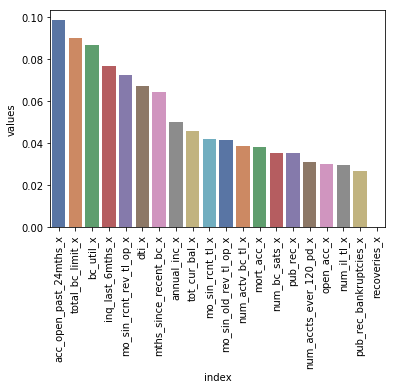

In [42]:
#important features Graph

import seaborn as sns
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.1, learning_rate=0.0005,
       max_delta_step=0, max_depth=4, min_child_weight=5, missing=None,
       n_estimators=1000, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.6)

classifier.fit(X_train, y_train)

feature_imp = pd.DataFrame(data=classifier.feature_importances_, index=X_train.columns.values, columns=['values'])
feature_imp.sort_values(['values'], ascending=False, inplace=True)
feature_imp.reset_index(level=0, inplace=True)
sns.barplot(x='index', y='values', data=feature_imp, palette='deep')
plt.xticks(rotation=90)
plt.show()

### Ranodm Forest

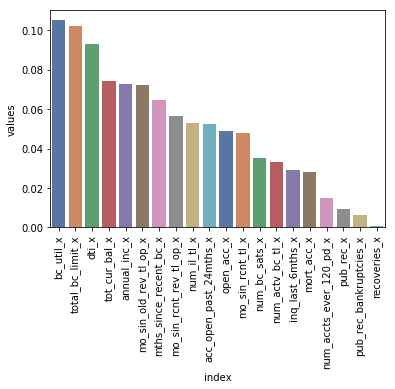

In [43]:


import seaborn as sns
classifier = rnd_clf = RandomForestClassifier(bootstrap=True,
                                 max_depth=20,
                                 max_features='sqrt',
                                 min_samples_leaf=2,
                                 min_samples_split=2,
                                 n_estimators=1200)#important features Graph
classifier.fit(X_train, y_train)

feature_imp = pd.DataFrame(data=classifier.feature_importances_, index=X_train.columns.values, columns=['values'])
feature_imp.sort_values(['values'], ascending=False, inplace=True)
feature_imp.reset_index(level=0, inplace=True)
sns.barplot(x='index', y='values', data=feature_imp, palette='deep')
plt.xticks(rotation=90)
plt.show()


<h2 align="center"> Post Loan Analysis

In [44]:
post_df = df.loc[df_reference['Year'] != 2014]


y=['depAB']
X=['acc_open_past_24mths_x', 'annual_inc_x', 'bc_util_x',
       'dti_x', 'inq_last_6mths_x', 'mo_sin_old_rev_tl_op_x',
       'mo_sin_rcnt_rev_tl_op_x', 'mo_sin_rcnt_tl_x', 'mort_acc_x',
       'mths_since_recent_bc_x', 'num_accts_ever_120_pd_x', 'num_actv_bc_tl_x',
       'num_il_tl_x', 'num_bc_sats_x', 'open_acc_x', 'pub_rec_bankruptcies_x',
       'pub_rec_x', 'recoveries_x', 'tot_cur_bal_x', 'total_bc_limit_x']


In [45]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(post_df[X], post_df[y], random_state=42)

In [55]:
# fit model no 2014 data
XGB_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.1, learning_rate=0.0005,
       max_delta_step=0, max_depth=4, min_child_weight=5, missing=None,
       n_estimators=1000, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.6)
XGB_clf.fit(X_train, y_train)

y_pred = XGB_clf.predict(X_test)
print( accuracy_score(y_test, y_pred))

0.708


In [56]:
#correlation matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       462
           1       0.75      0.69      0.72       538

   micro avg       0.71      0.71      0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



In [57]:
#2014 model on 2016/17 data
#Train model
X_train, X_test, y_train, y_test = train_test_split(pre_df[X], pre_df[y], random_state=42)
XGB_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.1, learning_rate=0.0005,
       max_delta_step=0, max_depth=4, min_child_weight=5, missing=None,
       n_estimators=1000, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.6)
XGB_clf.fit(X_train, y_train)

y_pred = XGB_clf.predict(X_test)
print( accuracy_score(y_test, y_pred))



0.708


In [58]:
X_train, X_test, y_train, y_test = train_test_split(post_df[X], post_df[y], random_state=42)


y_pred = XGB_clf.predict(X_test)
print( accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.636
              precision    recall  f1-score   support

           0       0.71      0.61      0.65       568
           1       0.57      0.68      0.62       432

   micro avg       0.64      0.64      0.64      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.65      0.64      0.64      1000



**Interpretation of Results:** Since we see a large decrease in AB accuracy (1) and a small difference in not AB accuracy (0), we can say that the model trained on 2014 data is more conservative and misclassifies AB grade loans at a significantly higher rate on the 2016/17 data. This is a piece of evidence that supports the notion that lending club has changed their lending practices post IPO.